### Abundances of satellites and CENP-B boxes

In [1]:
from __future__ import division
%pylab inline
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

species = ['homo_sapiens','pan_troglodytes','pan_paniscus','gorilla_gorilla','gorilla_berengei',
          'pongo_abelii','pongo_pygmaeus','chlorocebus_sabaeus','chlorocebus_pygerythrus','chlorocebus_aethiops','macaca_mulatta','macaca_fascicularis',
          'papio_anubis']

# cols = ['#e41a1c']*11 + ['#377eb8']*7 + ['#a65628']*4
cols = ['#e41a1c']*7 + ['#377eb8']*6

def parse_data(fn):
    """file format: species count total ratio
    return dict of ratios indexed by species."""
    d = {}
    with open(fn,'r') as f:
        for line in f:
            if '#' in line:
                continue
            line = line.rstrip().split()
            name=line[0]
            ratio=float(line[-1])
            d[name] = ratio
    return d

Populating the interactive namespace from numpy and matplotlib


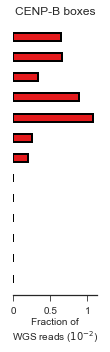

In [58]:
# CENP-B in unfiltered WGS reads
cb_total = parse_data('../data/cenp_b_ext.counts.txt')

plt.figure(figsize=(1.5,5.05))

x = np.arange(len(species))
y1 = np.array([cb_total[s] for s in species[::-1]])
barlist = plt.barh(x,y1,facecolor='black',height=0.4)
plt.yticks([])
plt.xticks([0,0.005,0.01],['0','0.5','1'],size=10)
plt.xlabel('Fraction of\nWGS reads ('+r'$10^{-2}$'+')',size=10)
# plt.ticklabel_format(axis='x',style='sci',scilimits=(0,1))
plt.title('CENP-B boxes',size=12)

for i,c in enumerate(cols[::-1]):
    bar = barlist[i]
    bar.set_linewidth(2)
    bar.set_edgecolor('black')
    bar.set_facecolor(c)
sns.despine(left=True)
plt.savefig('../figures/primate_cenpb.genome.abund.svg')

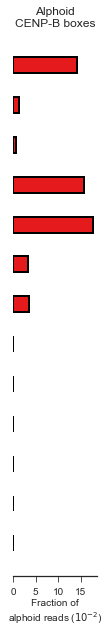

In [43]:
# CENP-B in filtered WGS reads (alphoid)
cb_alphoid = parse_data('../data/cenp_b_ext.counts.alphoid.txt')


plt.figure(figsize=(1.5,10))

x = np.arange(len(species))
y1 = np.array([cb_alphoid[s] for s in species[::-1]])
barlist = plt.barh(x,y1,facecolor='black',height=0.4)
plt.yticks([])
plt.xticks(size=10)
plt.xticks([0,0.05,0.1,0.15],['0','5','10','15'],size=10)
plt.xlabel('Fraction of\nalphoid reads ('+r'$10^{-2}$'+')',size=10)
plt.title('Alphoid\nCENP-B boxes',size=12)



for i,c in enumerate(cols[::-1]):
    bar = barlist[i]
    bar.set_linewidth(2)
    bar.set_edgecolor('black')
    bar.set_facecolor(c)
sns.despine(left=True)
plt.savefig('../figures/primate_cenpb_alphoid.abund.svg')

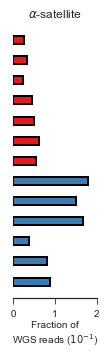

In [59]:
# Alpha satellite content
plt.figure(figsize=(1.5,5.05))
alphoid = parse_data('../data/alphoid.counts.txt')

x = np.arange(len(species))
y1 = np.array([alphoid[s] for s in species[::-1]])
barlist = plt.barh(x,y1,facecolor='black',height=0.4)
plt.yticks([])
plt.xticks([0,0.1,0.2],['0','1','2'],size=10)

plt.xlabel('Fraction of\nWGS reads ('+r'$10^{-1}$'+')',size=10)
plt.title(r'$\alpha$'+'-satellite',size=12)
for i,c in enumerate(cols[::-1]):
    bar = barlist[i]
    bar.set_linewidth(2)
    bar.set_edgecolor('black')
    bar.set_facecolor(c)
sns.despine(left=True)
plt.savefig('figures/primate_sat.abund.svg')

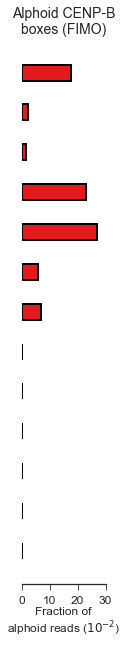

In [45]:
# CENP-B in filtered WGS reads (alphoid)
cb_alphoid = parse_data('../data/cenp_b_ext.counts.fimo.alphoid.txt')


plt.figure(figsize=(1.5,10))

x = np.arange(len(species))
y1 = np.array([cb_alphoid[s] for s in species[::-1]])
barlist = plt.barh(x,y1,facecolor='black',height=0.4)
plt.yticks([])
plt.xticks(size=12)
plt.xticks([0,0.1,0.2,0.3],['0','10','20','30'],size=12)
plt.xlabel('Fraction of\nalphoid reads ('+r'$10^{-2}$'+')',size=12)
plt.title('Alphoid CENP-B\nboxes (FIMO)',size=14)



for i,c in enumerate(cols[::-1]):
    bar = barlist[i]
    bar.set_linewidth(2)
    bar.set_edgecolor('black')
    bar.set_facecolor(c)
sns.despine(left=True)
plt.savefig('../figures/primate_cenpb_alphoid.fimo.abund.svg')

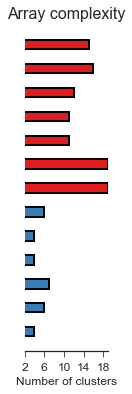

In [39]:
# CENP-B in filtered WGS reads (alphoid)

clusts = parse_data('../data/clusters.txt')

plt.figure(figsize=(1.5,6))

x = np.arange(len(species))
y1 = np.array([clusts[s] for s in species[::-1]])
barlist = plt.barh(x,y1,facecolor='black',height=0.4)
plt.yticks([])
plt.xticks(size=12)
plt.xticks([2,6,10,14,18],['2','6','10','14','18'],size=12)
plt.xlim(2,19)
plt.xlabel('Number of clusters',size=12)
plt.title('Array complexity',size=16)



for i,c in enumerate(cols[::-1]):
    bar = barlist[i]
    bar.set_linewidth(2)
    bar.set_edgecolor('black')
    bar.set_facecolor(c)
sns.despine(left=True)
plt.savefig('../figures/primate_clusters.svg')

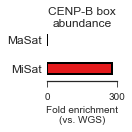

In [49]:
plt.figure(figsize=(1.25,0.8))

species = ['wgs','masat','misat']
cols = ['#1f78b4','#e41a1c']
delta=0.1
width =0.4
mouse = parse_data('../data/mouse.cenp_b_ext.counts.txt')
x = np.arange(len(species)-1)
y1 = np.array([mouse[s] for s in species[::-1]])
y1 = y1[:-1]/y1[-1]
barlist = plt.barh(x,y1,facecolor='black',height=width)
plt.xticks([0,300])
# plt.xticks([0,0.25,0.5],['0','25','50'],size=14)
plt.xlabel('Fold enrichment\n(vs. WGS)',size=10)
plt.title('CENP-B box\nabundance',size=12)
plt.yticks(x,['MiSat','MaSat'],size=12)
plt.tick_params(axis='y',length=0)

for i,c in enumerate(cols[::-1]):
    bar = barlist[i]
    bar.set_linewidth(2)
    bar.set_edgecolor('black')
    bar.set_facecolor(c)
sns.despine(left=True,bottom=False,offset=5)
plt.xticks(size=10)



# 
plt.savefig('../figures/mouse_cenpb.abund.svg')

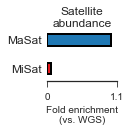

In [50]:
plt.figure(figsize=(1.25,0.8))

species = ['masat','misat']
cols = ['#1f78b4','#e41a1c']
delta=0.1
width =0.4
mouse = parse_data('../data/mouse.sat_counts.txt')
x = np.arange(len(species))
y1 = np.array([mouse[s] for s in species])
# y1 = y1[:-1]/y1[-1]
barlist = plt.barh(x,y1[::-1],facecolor='black',height=width)
# plt.xticks([0,300])
plt.xticks([0,0.1],['0','1.1'],size=10)
plt.xlabel('Fold enrichment\n(vs. WGS)',size=10)
plt.title('Satellite\nabundance',size=12)
plt.yticks(x,['MiSat','MaSat'],size=12)
plt.tick_params(axis='y',length=0)

for i,c in enumerate(cols[::-1]):
    bar = barlist[i]
    bar.set_linewidth(2)
    bar.set_edgecolor('black')
    bar.set_facecolor(c)
sns.despine(left=True,bottom=False,offset=5)
plt.xticks(size=10)



# 
plt.savefig('../figures/mouse_sat.abund.svg')